## Laboratory 10

# Control design of a robot arm process

## 10.1 Independent Joint Control

Independent joint control is the classical control approach, where a controller is designed for each individual joint (fig 10.1}). The effect of other joints is considered as a disturbance that the controller has to reject.

<br />
<br />

<center>
    <figure class="image">
      <img src="artwork/control/Control_1.png" width=40% />
      <figcaption>Figure 10.1: Independent joint control - PD controllers</figcaption>
    </figure>
</center>

<br />
<br />

Let us first rewrite a 2DOF model in terms of each individual joint $i$ :

\begin{equation}\label{decoupledmodel}
d_{ii}\ddot{q}_i+c_{ii}\dot{q}_i=\tau_i-w_i , \quad i=1,2,..,n \text{ (1)}
\end{equation}

where $d_{ii}$ includes only the constant diagonal terms of $D'(q)$, while the disturbance term $w_i$ includes all other $i^{th}$ terms of $D'(q)$, and $i^{th}$ components of $C(q,\dot{q})$ and $G(q)$. It is important to notice that if the the Coriolis and centripetal terms are not very large, then the process dynamics can be approximated well by _n decoupled linear second-order systems_.

### 10.1.1 Control problem

Design a linear controller for each joint that ensure tracking ($q$ tracks a reference signal $q_r$) and disturbance 
rejection ($w_{p}$).

Consider standard PD controllers
\begin{equation}\label{pd}
\tau_i=K(K_{di}\dot{e}_i+K_{pi}e_i) \text{ (2)}
\end{equation}
where $e_i$ represents the tracking error, defined as $e_i=q_{ri}-q_{i}$, and
$\dot{e}_i=\dot{q}_{di}-\dot{q}_{i}$ is the error of the derivatives.

If we consider the case of set-point tracking, that is $\dot{q}_{ri}=0$, and replace eq(2) in eq(1) we obtain:

\begin{equation}\label{simpleprocess}
d_{ii}\ddot{q}_i(t)+(c_{ii}+KK_{di})\dot{q}_i(t)+KK_{pi}q_i(t)=KK_{pi}q_{ri}(t)-w_{pi}(t) , \quad i=1,2,..,n \text{ (3)}
\end{equation}

By applying the Laplace transform we get the transfer function relating the outputs ($q_i$) to the reference and disturbance inputs ($q_{ri}$ and $w_{pi}$):
\begin{equation}\label{tf}
q_i(s)=\frac{KK_{pi}}{d_{ii}s^2+(c_{ii}+KK_{di})s+KK_{pi}}q_{ri}(s)-\frac{1}{d_{ii}s^2+(c_{ii}+KK_{di})s+KK_{pi}}w_{pi}(s), \quad i=1,2,..,n \text{ (4)}
\end{equation}

The characteristic equations are 
\begin{equation}
{d_{ii}s^2+(c_{ii}+KK_{di})s+KK_{pi}}=0, \text{ (5)}
\end{equation}
which can also be written as
\begin{equation}
s^2+\frac{c_{ii}+KK_{di}}{d_{ii}}s+\frac{ KK_{pi}}{d_{ii}}=0.   \text{ (6)}
\end{equation}

Because the standard second order equation is given by
\begin{equation}
s^2+2 \zeta_i \omega_{ni}s+\omega^2_{ni}=0, \text{ (7)}
\end{equation}

the controller parameters can be expressed in terms of damping ratio $\zeta$ and natural frequency $\omega_n$:

\begin{equation}\label{pdgain}
K_{pi}=\frac{d_{ii}\omega^2_{ni}}{K} , \quad K_{di}=\frac{2\zeta_i \omega_{ni} d_{ii}-c_{ii}}{K}  \text{ (8)}
\end{equation}

Usually $\zeta$ is set to 1 (critical damping), and $\omega_n$ is chosen as high
as possible. One possible limitation in the value adopted for $\omega_n$ is the
input torque $\tau_i$ saturation.
The control strategy proves very efficient in practice. If we further want to force a very small or null steady state error $e_{ss}$, then we can either adopt PID type controllers

\begin{equation}\label{pid}
\tau_i=K_{di}\dot{e}_i+K_{pi}e_i+K_{ii}\int_{0}^{t} e\,dt, \text{ (9)}
\end{equation}

or PD controllers with an additional gravity term. Note that in this case the control signals are not decoupled anymore.

\begin{equation}\label{pdgrav}
\tau_i=K_{di}\dot{e}_i+K_{pi}e_i+G'_i(q) \text{ (10)}
\end{equation}

##  10.3 Numerical results

### 10.3.1 Robot arm example

As an example of a 2DOF robot with the structure as in Figure 7.1 (from Dynamic Model laboratory), consider the robot from Figure 10.4., that we model using eq(10.1).

The parameters are (either measured or estimated) :$L_1=0.095 \ m$, $L_2=0.1 \ m$, $m_1=0.095 \ kg$, $m_2=0.37\ kg$, $g=9.81 \ m/s^2$, $I_{1x}=2.27 \ 10^{-2} \ kg \ m^2$, $I_{2y}=2.27 \ 10{-2} \ kg \ m^2$, $b_1=0.24$, $b_2=0.16$, $r=1$. The torque control signal is limited to the range $[-1.18,1.18] \, Nm$.

<center>
    <figure class="image">
      <img src="artwork/control/Control_4.png" width=40% />
      <figcaption>Figure 10.4: Real robot arm process  </figcaption>
    </figure>
</center>

### 10.3.2 Independent Joint Control

Here we will design PD controller for independent joint controller

\begin{equation}
\tau_1=K_{d1}\dot{e}_1+K_{p1}e_1,
\tau_2=K_{d2}\dot{e}_2+K_{p2}e_2, \text{ (21)}
\end{equation}

for the robot process eq(10.1), with the parameters given in previous section. We will use the formula eq(7.5), with $B=0, J_{p1}=0.0263$,$J_{p2}=0.0236$, $\zeta=1$, $K=1$. We started from a value for $\omega_n=\omega_{n1}=\omega_{n2}$ of 0.1, an increased it until the step response of the closed loop system is fast enough, and the control torques reach saturation for a small time interval. In the end, a value of $12$ provided good enough results.

Figure 10.5 shows simulations results of the closed loop system with step reference signals, while Figure 10.6 shows the control torques. The results show that a small steady state is present. This can be eliminated by adding a gravity term as in eq(10.10). The results with PD+gravity control are shown in Figure 10.7. It can be noticed that now the steady state error is zero. Note that in the case of PD+gravity controller, the controller is no longer joint independent, due to the gravity terms that contain expressions in both joint variables $q_1$ and $q_2$.

A more interesting and demanding tracking scenario is that when the reference signals are sinusoidal ($q_r(t)=sin(t)$), which is shown Figure 10.8 for the PD+gravity controllers. Although the steady state error is now exactly zero, because the reference continuously changes, the error is kept into very small limits.  

<center>
    <figure class="image">
      <img src="artwork/control/Control_5.png" width=70% />
      <figcaption>Figure 10.5: Simulations with PD independent joint control - step response </figcaption>
    </figure>
</center>

<center>
    <figure class="image">
      <img src="artwork/control/Control_6.png" width=70% />
      <figcaption>Figure 10.6: Control torques for PD independent joint control  </figcaption>
    </figure>
</center>

<center>
    <figure class="image">
      <img src="artwork/control/Control_7.png" width=70% />
      <figcaption>Figure 10.7:Simulations with PD+Gravity joint control - step response  </figcaption>
    </figure>
</center>

<center>
    <figure class="image">
      <img src="artwork/control/Control_8.png" width=70% />
      <figcaption>Figure 10.8: Simulations with PD+Gravity joint control - sinusoidal response </figcaption>
    </figure>
</center>

## 10.4 Proposed problems

  1. Consider the AL5D_mdw robot with known matrices D,C,G given in the code. Implement an Independent Joint Control with PD controllers.
  
    a. Use step of amplitude 0.1 and interpret the plots.
    b. Adapt the natural frequencies and observe their influence on the movement and position of the robot.
    c. Add an integrator and tune its gain empirically, for a PID; intepret the plots.
    d. Use a sine wave of amplitude 0.5 as input joint trajectories interpret the plots.

In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from odeintw import *
import math as m
from math import pi
import roboticstoolbox as rtb
from roboticstoolbox import *
from lab_functions import *
plt.style.use('rcs.mplstyle')

# loading robot model
rob = rtb.models.DH.AL5D_mdw()

# real system of al5d
def model(x,t,tau):  
    tau = tau.reshape(5,1) # reshaping for mathematical operations
    
    q  = x[:,0]  #first column of x, the states
    dq = x[:,1]  #second column of x, the states derivated

    G = rob.gravload(q).reshape(5,1)
    D = rob.inertia(q)
    C = rob.coriolis(q, dq)
    
    xdot1 = dq.reshape(5,1)
    xdot2 = np.matmul(np.linalg.inv(D), (tau - C.dot(dq).reshape(5,1) - G))
    
    xdot = np.concatenate((xdot1, xdot2), axis=1)

    return xdot

D = rob.inertia([0.1, 0.1, 0.1, 0.1, 0.1])
C = rob.coriolis([0.1, 0.1, 0.1, 0.1, 0.1], [0.1, 0.1, 0.1, 0.1, 0.1])

# time step
dt = 0.01

# final time
tf = 20

# nr of samples
n = int(np.round(tf/dt))

# Desired time samples for the solution. 
# np.arrange - returns evenly spaced values within a given interval.
t = np.arange(0, tf, dt)

# step reference
sp = 0.1*np.heaviside(t, 0)

# initialisation
q  = np.zeros((n,5))
dq = np.zeros((n,5))
tau = np.zeros((n,5))

# x0 is the initial condition of the state space
x0 = np.zeros((5,2))

# natural frequencies and damping coefficient
wn1, wn2, wn3, wn4, wn5 = 10, 10, 10, 10, 10
wn = [wn1, wn2, wn3, wn4, wn5]
zeta = 1
Kp = np.zeros(5)
Kd = np.zeros(5)
Ki = np.zeros(5)

for i in range(0,5):
    Kp[i] = D[i,i]*wn[i]**2;
    Kd[i] = D[i,i]*wn[i]*2*zeta - C[i,i];

Ki = [4,8,4,1,1]


print(Kp)
print(Kd)
print(Ki)

qr = np.sin(t)/2

sumErr = np.zeros(5)

# solve ODE for each step
for i in range(2,n):
    # progress bar for visualisation of elapsed time
    printProgressBar((i+1)/n, prefix="Progress:", suffix="complete", length=60)

    # span for next time step
    tspan = [t[i-1],t[i]]  

    # compute torques from the control law
    for j in range(5):
        sumErr[j] += qr[i] - q[i-1,j];
        tau[i,j] = Kp[j]*(qr[i]-q[i-1][j])+Kd[j]*(0-dq[i-1][j])+Ki[j]*sumErr[j]*dt;

    # solve for next step
    x = odeintw(model,x0,tspan,args=(tau[i,:],))

    # store solution for plotting
    q[i,:]  = x[1][:,0]
    dq[i,:] = x[1][:,1]

    # next initial condition 
    x0 = x[1]

[0.44252958 1.10594536 0.54010095 0.01888074 0.01227862]
[0.08887426 0.2215883  0.10797819 0.00377929 0.00245572]
[4, 8, 4, 1, 1]


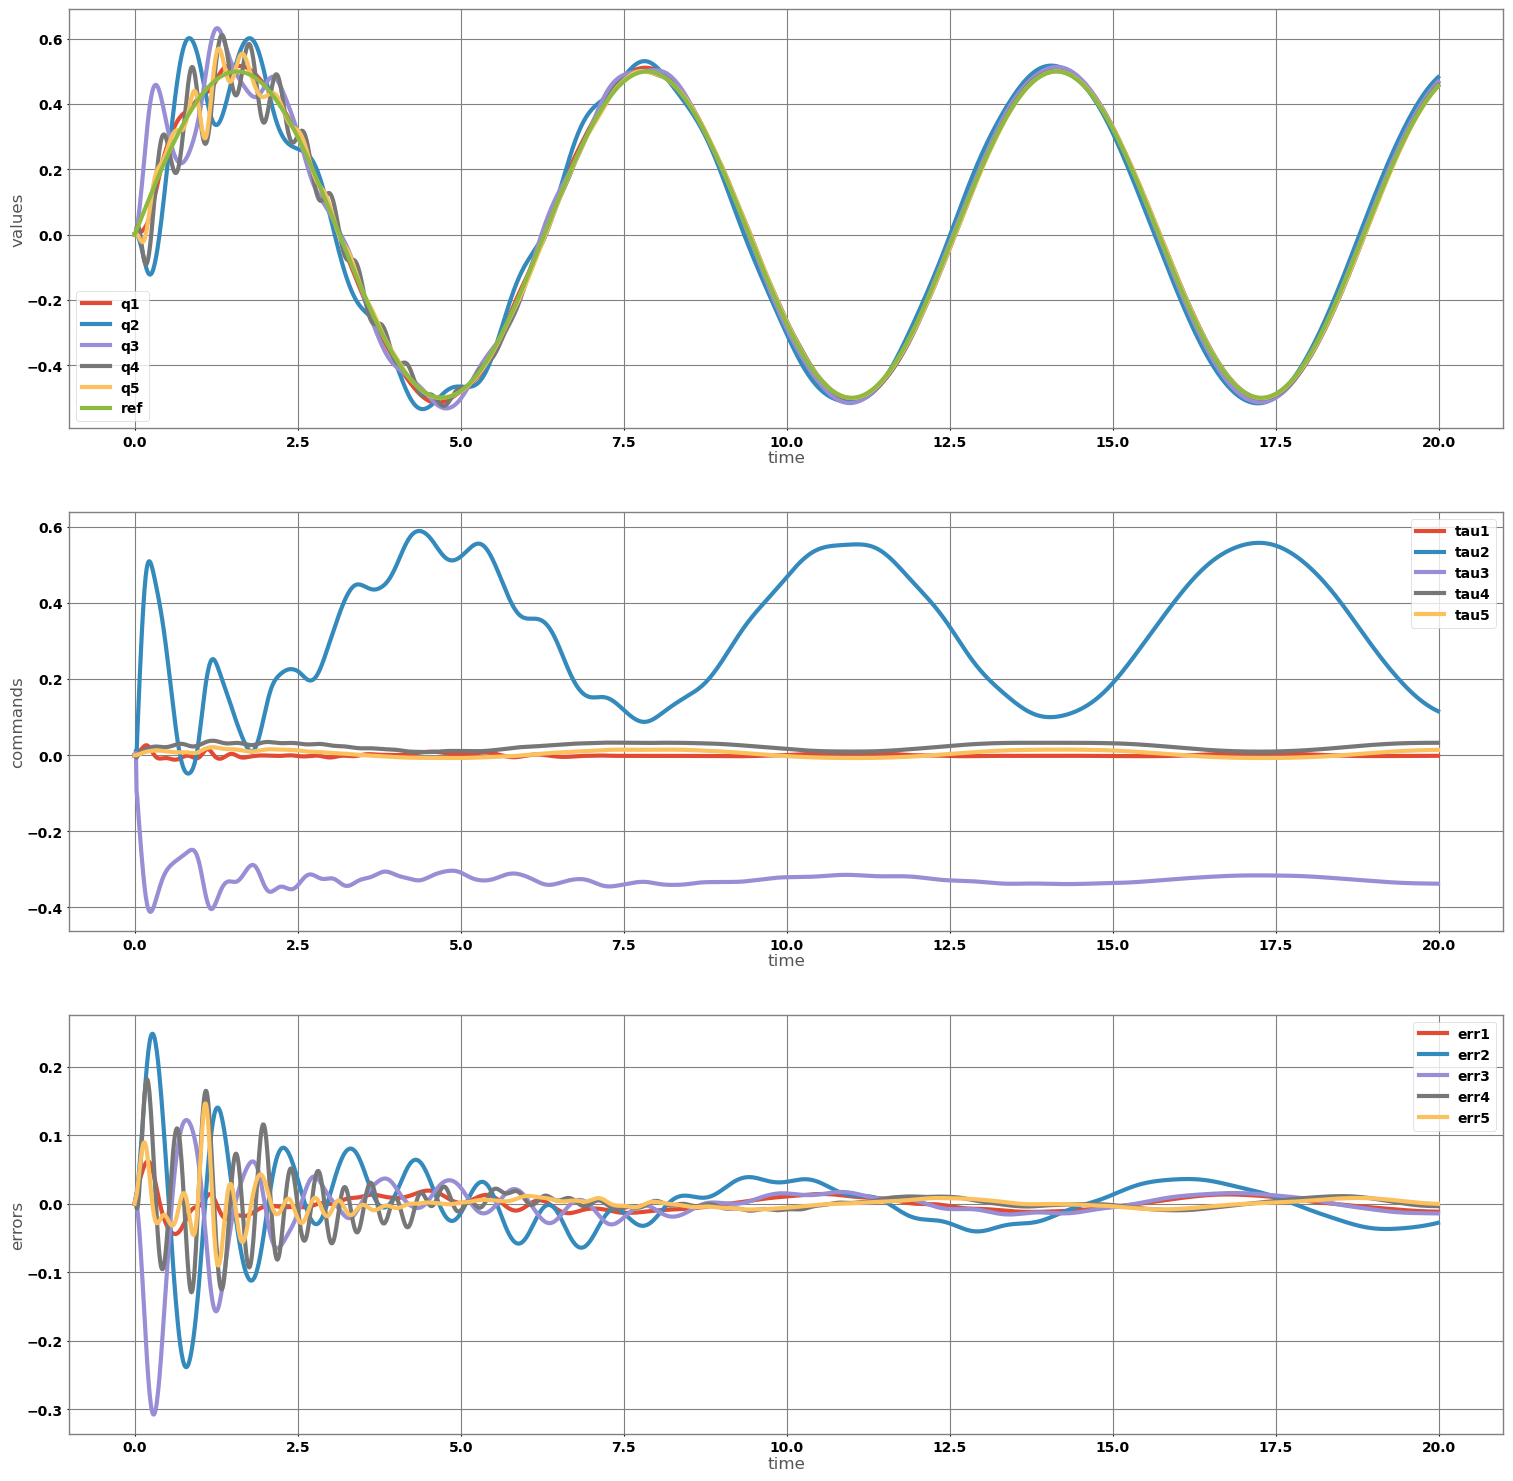

In [2]:
# plots 
fig = plt.figure()
fig.set_size_inches(18.5, 18.5)

plt.subplot(3, 1, 1)
plt.plot(t, q[:,0], label='q1')
plt.plot(t, q[:,1], label='q2')
plt.plot(t, q[:,2], label='q3')
plt.plot(t, q[:,3], label='q4')
plt.plot(t, q[:,4], label='q5')
plt.plot(t, qr, label='ref')
plt.legend(loc='best')
plt.ylabel('values')
plt.xlabel('time')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(t, tau[:,0], label='tau1')
plt.plot(t, tau[:,1], label='tau2')
plt.plot(t, tau[:,2], label='tau3')
plt.plot(t, tau[:,3], label='tau4')
plt.plot(t, tau[:,4], label='tau5')
plt.legend(loc='best')
plt.ylabel('commands')
plt.xlabel('time')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(t, qr-q[:,0], label='err1')
plt.plot(t, qr-q[:,1], label='err2')
plt.plot(t, qr-q[:,2], label='err3')
plt.plot(t, qr-q[:,3], label='err4')
plt.plot(t, qr-q[:,4], label='err5')
plt.legend(loc='best')
plt.ylabel('errors')
plt.xlabel('time')
plt.grid(True)

plt.show()        

In [5]:
# animation

rob = rtb.models.URDF.AL5D_mdw()
rob.plot(q, backend="swift")

Swift backend, t = 25.00000000000022, scene:
  AL5D_mdw